In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
%matplotlib inline

## 정규방정식

In [2]:
x = 2*np.random.rand(100,1)
y = 4 +3*x +np.random.randn(100,1)

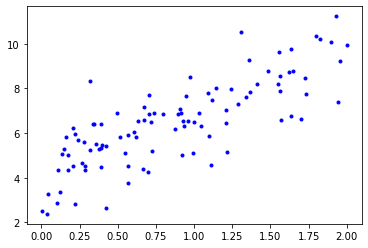

In [3]:
plt.plot(x,y,'b.')

In [4]:
x_b = np.c_[np.ones((100,1)),x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) # 행렬로 파라미터 구하기
theta_best

array([[4.13591412],
       [2.70472992]])

In [5]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.13591412],
       [9.54537395]])

(0.0, 2.0, 0.0, 13.0)

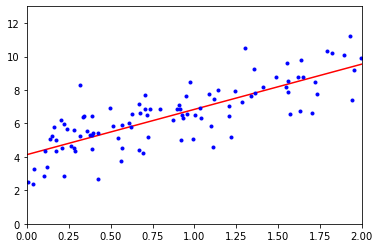

In [6]:
plt.plot(x_new, y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,13])

In [7]:
# 사이킷런으로 선형회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.13591412]), array([[2.70472992]]))

In [8]:
lin_reg.predict(x_new)

array([[4.13591412],
       [9.54537395]])

In [9]:
theta_best_svd, residuals,ranks,s = np.linalg.lstsq(x_b,y,rcond=1e-6) # 최소자승법
theta_best_svd

array([[4.13591412],
       [2.70472992]])

## 경사하강법

In [10]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta - eta*gradients
theta

array([[4.13591412],
       [2.70472992]])

## 확률적 경사하강법

In [11]:
n_epochs = 50
t0, t1 = 5,50 #학습스케쥴 하이퍼 파라미터

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
theta

array([[4.07485268],
       [2.66227116]])

## 다항 회귀

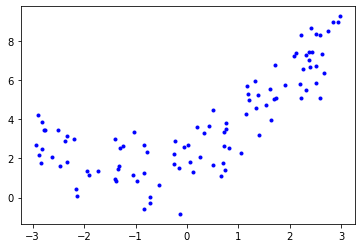

In [12]:
m = 100
x = 6*np.random.rand(m,1)-3
y = 0.5*x*x + x + 2 + np.random.randn(m,1)

plt.plot(x,y,'b.')

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0],x_poly[0]

(array([0.20426647]), array([0.20426647, 0.04172479]))

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_, lin_reg.coef_ # y 절편, 계수

(array([2.0551215]), array([[1.01782722, 0.45201579]]))

## 학습곡선

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)      

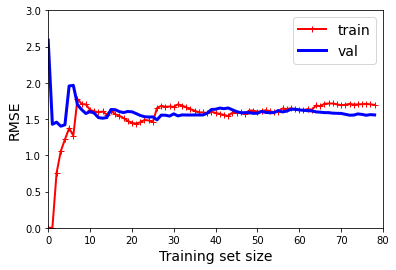

In [16]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)
plt.axis([0, 80, 0, 3])                         # 책에는 없음
plt.show()

(0.0, 80.0, 0.0, 3.0)

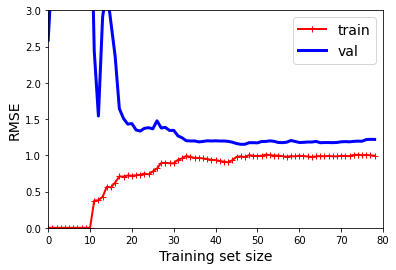

In [17]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
    ('lin_reg',LinearRegression()),
])

plot_learning_curves(polynomial_regression,x,y)
plt.axis([0, 80, 0, 3]) 

## 규제가 있는 선형 모델

### 1. 릿지 회귀

In [41]:
np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
x_new = np.linspace(0, 3, 100).reshape(100, 1)

In [42]:
from sklearn.linear_model import Ridge,SGDRegressor
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [43]:
sdg_reg = SGDRegressor()
sdg_reg.fit(x,y)
sdg_reg.predict([[1.5]])

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1.46543286])

### 라쏘 회귀

In [44]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### 엘라스틱넷

In [45]:
from sklearn.linear_model import ElasticNet

ela_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # 혼합비율
ela_net.fit(x,y)
ela_net.predict([[1.5]])

array([1.54333232])

### 조기종료

In [46]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 2 + x + 0.5 * x**2 + np.random.randn(m, 1)

x_train, x_val, y_train, y_val = train_test_split(x[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [47]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ('poly_features',PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler',StandardScaler())
])

x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

sgd_reg = SGDRegressor(max_iter=1,tol=-np.inf,warm_start=True,penalty=None,learning_rate='constant',eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled,y_train) # 훈련을 이러서 진행
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## 로지스틱 회귀

In [26]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [27]:
X = iris['data'][:,3:] # 꽃의 넓이
y = (iris['target']==2).astype(np.int)

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

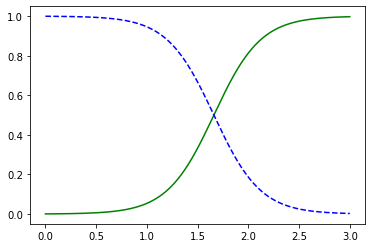

In [30]:
# 꽃 넓이가 0~3인 값에 대한 추정확률
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proda = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proda[:,1],'g-',label='Iris virginica')
plt.plot(X_new, y_proda[:,0],'b--',label='Not Iris virginica')

In [31]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## 소프트맥스 회귀

In [34]:
# 특성이 늘어났을 때
X=iris['data'][:,(2,3)]
y=iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [35]:
softmax_reg.predict([[5,2]])

array([2])

In [36]:
softmax_reg.predict_log_proba([[5,2]])

array([[-14.26490421,  -2.85609209,  -0.05921261]])

In [38]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])